# HW 08

> Back Bay National Wildlife Refuge is located in the southeastern corner of the City of Virginia Beach. The refuge was established in 1938 to protect and provide habitat for migrating and wintering waterfowl. Diverse habitats, including beachfront, freshwater marsh, dunes, shrub-scrub and upland forest are home to hundreds of species of birds, reptiles, amphibians, mammals and fish.

![BNWR](https://www.fws.gov/sites/default/files/styles/banner_image_xl/public/banner_images/2020-09/waterfowl%20%28tundras%29.jpg?h=0c8d0f81&itok=NcZlpD27)


To get introduced to the park and its history, please view the following interactive story map.

[BBNWR History and Introduction](https://storymaps.arcgis.com/stories/960d9db38cca4f3d8d38111119b9874f)

Additionally, here is some drone footage of the park for a better look at the geography and ecology of the area.

[BBNWR Drone Footage](https://www.youtube.com/watch?v=NlW330aBTCc)

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
bbnwr = pd.read_csv("./BKB_WaterQualityData_2020084.csv")
bbnwr["Site_Id"] = bbnwr["Site_Id"].replace("d", "D")
bbnwr.columns

Index(['Site_Id', 'Unit_Id', 'Read_Date', 'Salinity (ppt)',
       'Dissolved Oxygen (mg/L)', 'pH (standard units)', 'Secchi Depth (m)',
       'Water Depth (m)', 'Water Temp (?C)', 'Air Temp-Celsius',
       'Air Temp (?F)', 'Time (24:00)', 'Field_Tech', 'DateVerified',
       'WhoVerified', 'AirTemp (C)', 'Year'],
      dtype='object')

## Question 1


### Part (a)

Plot the distribution of "Water Depth (m)". Comment on this distribution. What do you notice? Calculate a numerical summary that expresses this main feature of the plot.

Axes(0.125,0.11;0.775x0.77)
0.7625586956521739
nan
0.6210053444690861


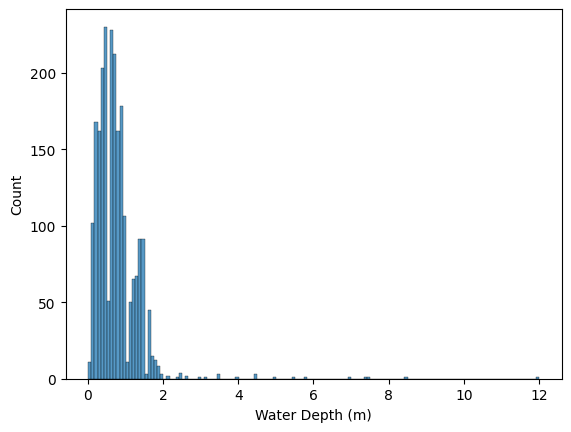

In [34]:
# answer 
distribution = sb.histplot(bbnwr['Water Depth (m)'])
print(distribution)
np.mean(bbnwr['Water Depth (m)'])
np.median(bbnwr['Water Depth (m)'])
np.std(bbnwr['Water Depth (m)'])
print(np.mean(bbnwr['Water Depth (m)']))
print(np.median(bbnwr['Water Depth (m)']))
print(np.std(bbnwr['Water Depth (m)']))





This summary appears to be bimodal and skewed right. 

### Part (b)

In this problem we will treat the values of "Water Depth (m)" as a population. Pull out this column by itself into a variable (`waterdepth`). Remove all missing values.

For this population, compute the mean and standard deviation.

In [9]:
# population mean and std dev
itself = bbnwr["Water Depth (m)"].dropna()
print(itself)
print(itself.mean)
print(itself.std)

0       0.40
1       0.35
2       0.60
3       0.50
4       0.40
        ... 
2366    1.20
2367    0.60
2368    0.90
2369    0.90
2370    0.10
Name: Water Depth (m), Length: 2300, dtype: float64
<bound method Series.mean of 0       0.40
1       0.35
2       0.60
3       0.50
4       0.40
        ... 
2366    1.20
2367    0.60
2368    0.90
2369    0.90
2370    0.10
Name: Water Depth (m), Length: 2300, dtype: float64>
<bound method Series.std of 0       0.40
1       0.35
2       0.60
3       0.50
4       0.40
        ... 
2366    1.20
2367    0.60
2368    0.90
2369    0.90
2370    0.10
Name: Water Depth (m), Length: 2300, dtype: float64>


Using theoretical results from class, for a sample size of $n = 20$ units, calculate the *theoretical* mean and standard error of a sample mean of water depths using a simple random sample. Print out the values.

In [5]:
# theoretical mean and std error of sample mean

### Part (c)

Create a simulation of taking samples of 20 units and compute the sample mean. Repeat this simulation 1000 times. In order to ensure that our "population" is sufficiently large, use the `replace = True` option to the `sample` method.

Using the results, calculate the **empirical** mean and standard error of the mean. We would not expect it to be exactly the same as the values calculated in the previous part, but it should be close.

In [6]:
# simulation

### Part (d)

Repeat Part (c) for a sample size of 1000. Graph the two distributions (use two code cells so that they get separate plots). What do you notice? Look carefully at the scales and at the shape of each distribution.

In [7]:
# Simulation 

### Part (e)

According to the Gaussian empirical rule, 68% of observations should be within one standard error of the theoretical mean for $\bar X$.

For the two simulations, compute the empirical probability of an observation falling within one (theoretical) SEM of the (theoretical) mean of $\bar X$. (Note: you will need to calculate the SEM for the sample mean of samples of size

In [8]:
# empirical mean of sample means and standard error

Comment on what you see. In particular, do you think the Central Limit Theorem would apply to a sample of 20 for this population? What about a sample of size 1000?

Double click to edit for your answer.

## Question 2

### Part (a)
As you probably noticed, the water depth measure is rather skewed. Select a transformation that minimizes the coefficient of skewness. Implement this and save it as `water_xform`.

Axes(0.125,0.11;0.775x0.77)


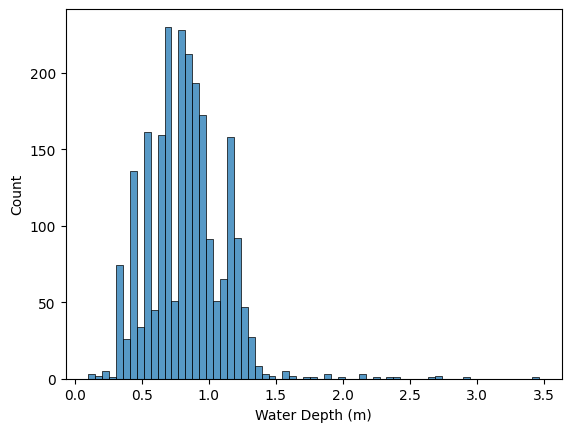

In [22]:
# transformation
water_xform = sb.histplot(bbnwr['Water Depth (m)'].transform(np.sqrt))
print(water_xform)





### Part (b)

Repeat the two simulations ($n = 20$, $n = 1000$) using the un-skewed water depth and compute the proportion of observations that fall within with one SEM. Note that you will need to recalculate the theoretical mean and standard error based on the transformed values.

In [10]:
# simulations

### Part (c)

Comment the results of Question 1 and Question 2. What do we see about the quality of the Central Limit Theorem approximation in these two cases?

Double click to edit for your answer.

## Question 3

### Part (a)

Create a table that has only the log of "Water Depth (m)" and "Year" as values. Limit the table to years after 1980. Drop any rows with missing values. Call this table `water_year`.

Plot these values in a scatter plot.

<Axes: >

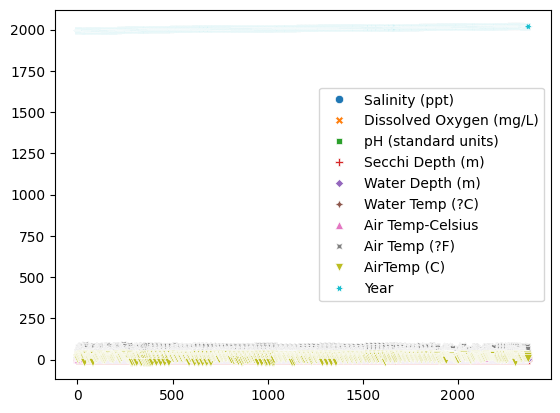

In [29]:
# scatter plot
water_year = bbnwr[(bbnwr['Year'] > 1980) & bbnwr['Water Depth (m)'].notna()]
sb.scatterplot(water_year)

### Part (b)

Treating `water_year` as a population, take samples of size $n = 100$ (using `replace = True` again). For each, calculate the correlation of log water depth and year.

Compare average the correlation coefficient with the "population" correlation coefficient of the `water_year` table. Evaluate the standard deviation of the sampling distribution and compare it to the theoretical standard error ($1/\sqrt{n}$).

In [12]:
# simulation and comparison